# Chapter 1: Getting to know `asyncio`.

* **`Asynchronous Programming:`** It means that a particular long-running task can be run in the background separate from the main application. Instead of blocking all other application code waiting for that long-running task to be completed, the system is free to do other work that is not dependent on that task. Then, once the long-running task is completed, we’ll be notified that it is done so we can process the result.

* **`Coroutines:`** A coroutine is a method that can be paused when we have a potentially long-running task and then resumed when that task is finished.

* **`Single Threaded Event Loop:`** A **concurrency** model used in asynchronous programming where a single thread manages and executes multiple tasks without blocking. In Python, this model is implemented using the `asyncio` library.

The concept is simple: instead of creating multiple threads or processes to handle concurrent tasks, you run everything in a single thread. The event loop manages the scheduling and execution of multiple tasks (also known as coroutines) by switching between them when one task is waiting for I/O operations to complete (e.g., network requests, disk read/writes). This way, the event loop can execute other tasks while the original task is waiting for I/O.

**Key Concepts:**

* **Coroutines:** Functions that can be paused and resumed later. These are defined using **`async def`** and allow the event loop to manage long-running tasks efficiently.

* **`Non-blocking I/O:`** Instead of waiting for I/O tasks (like downloading a webpage), the event loop can move on to other tasks and come back to the original task once the I/O operation is complete.

* **`Single-threaded:`** The entire event loop runs on a single thread, meaning there is **no parallel execution** in terms of CPU-bound tasks. This is ideal for **`I/O-bound workloads`**, not CPU-bound tasks.

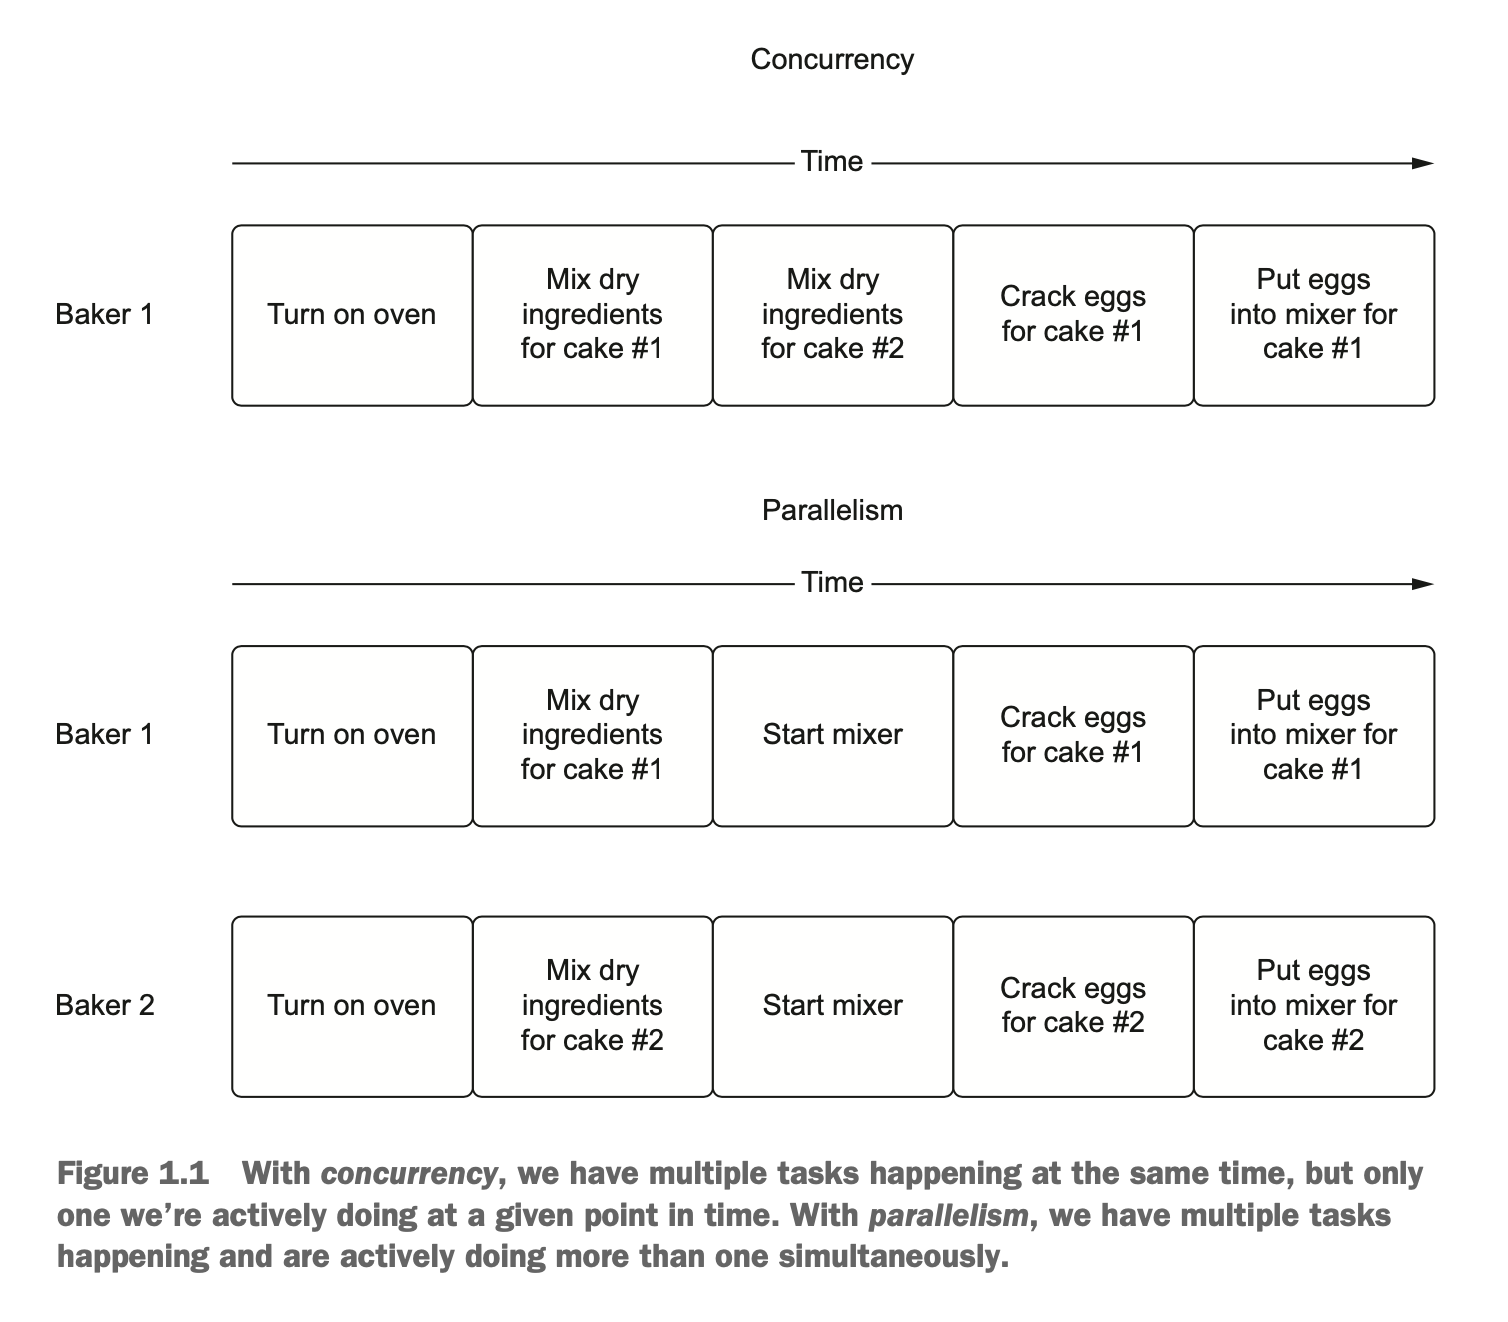

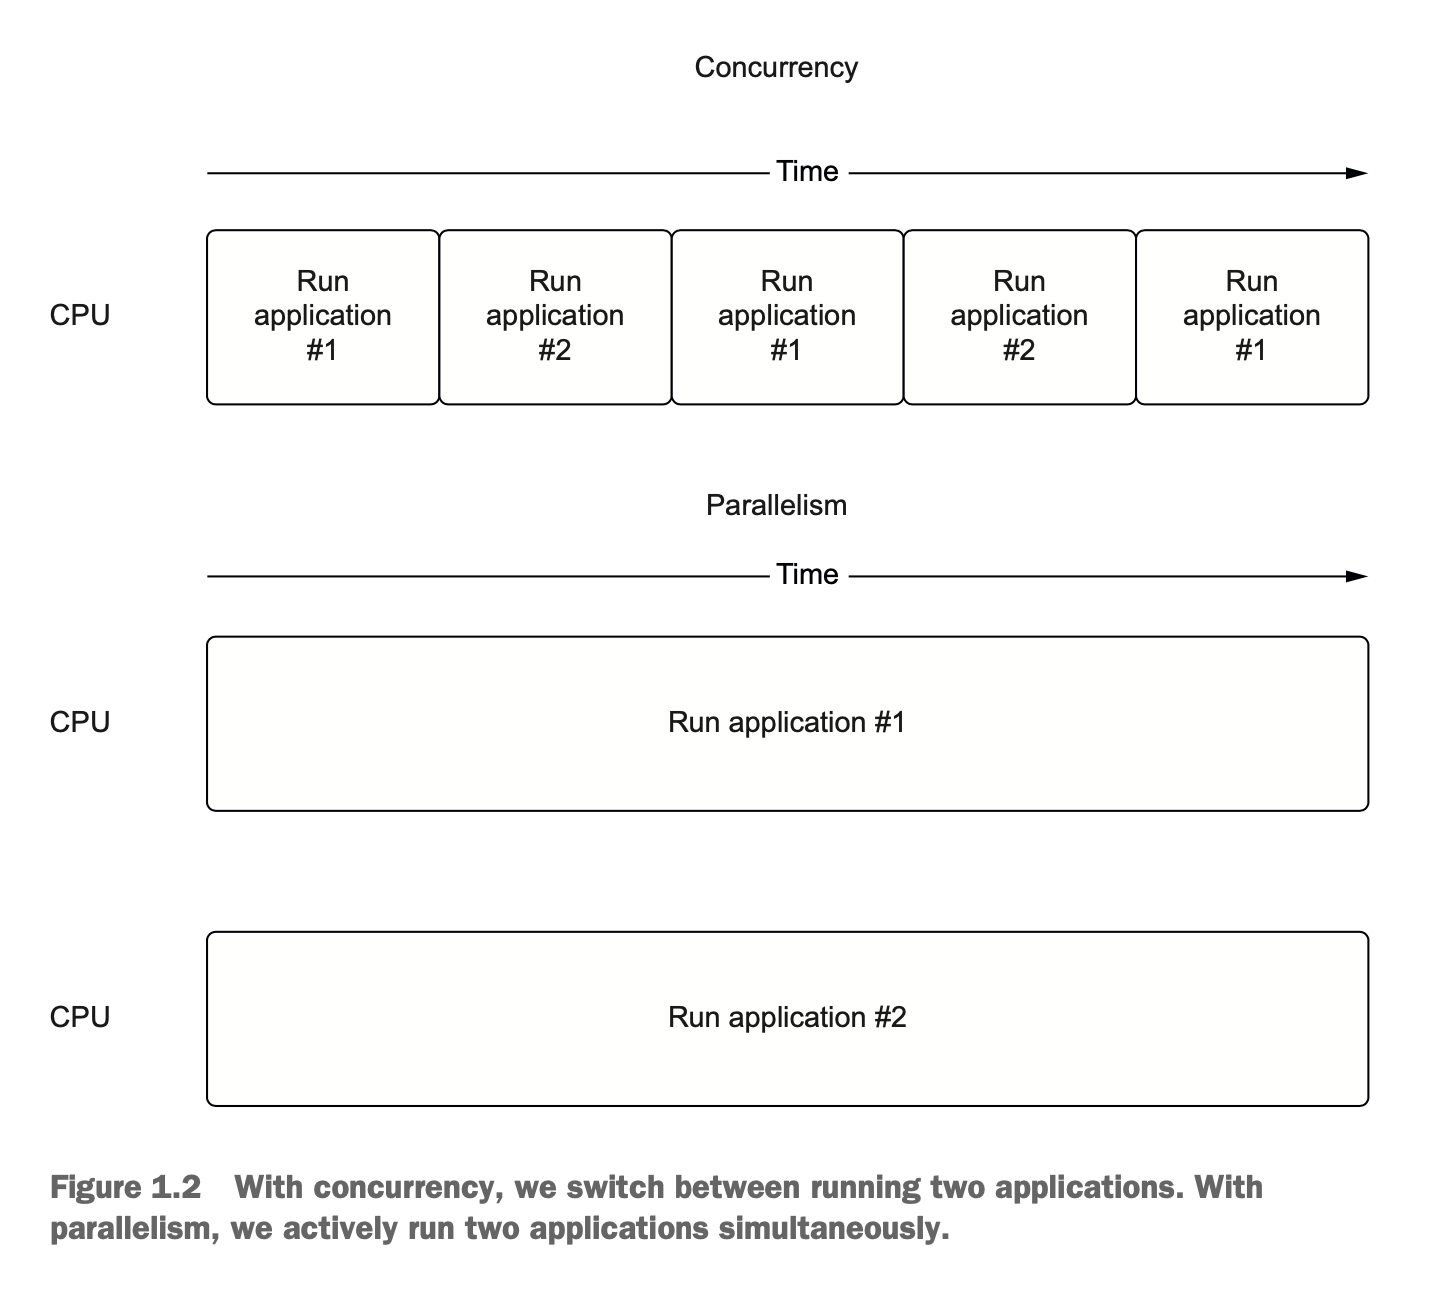

## Understanding Concurrency, Parallelism, and Multitasking

In modern programming, concurrency, parallelism, and multitasking are crucial concepts for optimizing the performance of applications, especially in environments where efficiency and time management are essential.

#### Concurrency

**Concurrency** refers to the ability of a system to handle multiple tasks at the same time by quickly switching between them. However, this doesn't mean that the tasks are running simultaneously, but rather that the system appears to manage them in a way that no task seems to block the others for a long period.

An analogy for understanding concurrency can be baking two cakes. While waiting for the oven to preheat, you can start mixing the ingredients for Cake #1. While those ingredients are mixing, you can begin cracking eggs for Cake #2. You’re switching between the two tasks efficiently so that neither task is blocked or waiting unnecessarily. This switching between tasks represents **concurrent behavior**. 

In programming, concurrency allows a system to switch between tasks rapidly, giving the illusion that they are running at the same time, even if, under the hood, they are being executed one after another.

#### Parallelism

**Parallelism**, on the other hand, occurs when tasks are not only being managed concurrently but are also executed at the same time. This is typically possible when the system has more than one CPU core available.

Let’s extend the cake-baking analogy to introduce a second baker. Now, while you are preparing Cake #1, the second baker can work on Cake #2. Here, two separate tasks are running at the same time without interrupting each other, representing true **parallel execution**.

In the case of computer applications, a parallel system can run multiple tasks at the same time. For instance, if a CPU has multiple cores, each core can handle a separate task, allowing true parallelism to occur. It’s important to note that parallelism implies concurrency, but the reverse isn’t always true. 

#### The Difference Between Concurrency and Parallelism

While the terms are often confused, the difference between concurrency and parallelism lies in how the tasks are executed:
- **Concurrency** is about managing multiple tasks that can be switched between. It can happen even on a single-core CPU where tasks are not running simultaneously but rather in an interleaved manner.

- **Parallelism** requires multiple tasks to be executed at the same time, which generally necessitates a multi-core CPU.

To summarize:
- Concurrency is like switching between tasks quickly, giving the appearance that they’re all happening simultaneously.
- Parallelism is running tasks at the same time on different processors or cores.

#### Multitasking

**Multitasking** is the broader concept that encompasses both concurrency and parallelism. It allows a system to handle multiple tasks at once, either through rapid switching (concurrency) or simultaneous execution (parallelism).

There are two main types of multitasking:
1. **Preemptive Multitasking**: This type of multitasking lets the operating system decide which task gets executed and when, typically using a technique called **time slicing**. The OS can switch between different tasks, pausing one task and resuming another, based on a scheduling algorithm.
   
2. **Cooperative Multitasking**: In cooperative multitasking, the application itself dictates when it’s appropriate to switch tasks. This approach is less resource-intensive because the system only switches tasks at points explicitly defined by the developer.

#### Preemptive Multitasking

In preemptive multitasking, the operating system controls when a task is switched or **preempted**. It divides the CPU time between tasks using time slicing. The operating system handles the complexity of switching between multiple tasks, allowing for concurrent execution.

#### Cooperative Multitasking

In cooperative multitasking, the application or process being executed explicitly yields control, allowing other processes to execute. This can happen, for example, when a process is waiting for an external event, such as a network response or file read operation, and it pauses itself, allowing another task to execute.

One advantage of cooperative multitasking is efficiency—it only switches between tasks when it’s logical to do so, thereby reducing unnecessary overhead and ensuring smooth task switching. Python's `asyncio` library is an example of cooperative multitasking, where tasks voluntarily release control to allow others to run when awaiting responses or data.

#### Benefits of Cooperative Multitasking

Cooperative multitasking has two main benefits:
- **Resource efficiency**: It avoids the overhead of unnecessary context switching that happens in preemptive multitasking.
- **Granularity**: It allows the developer to control when tasks are paused or resumed, leading to more efficient task management.

With cooperative multitasking, concurrency is achieved by enabling multiple tasks to start at once, though they don't run simultaneously. In Python, we can mark tasks with `async` and `await`, indicating where the program should yield control to other tasks.

---

**Note:** Concurrency is happening two tasks at the same time, although only one task is getting executed at a time, that is switching between the tasks that is also called **Multitasking**.

* **Parallelism:** While parallelism means Cocurrency + both the two tasks are getting executed both at the same time.

---

## Understanding processes, threads, multithreading and multiprocessing

In Python, **concurrency** is achieved through **processes** and **threads**. To fully grasp how concurrency works, it's important to first understand the differences between **processes**, **threads**, and how Python handles them through **multithreading** and **multiprocessing**.

### Threads
A **thread** is a **smaller unit** within a **process** that shares the **same memory space**. A single process can have multiple threads, which allows tasks to be performed concurrently. Unlike processes, threads can access and modify the same memory, which makes them efficient but also prone to race conditions (if not handled carefully).

Each Python program begins with a **main thread**, and you can create additional threads to perform other tasks concurrently. Threads are lightweight compared to processes because they don't require separate memory allocation.

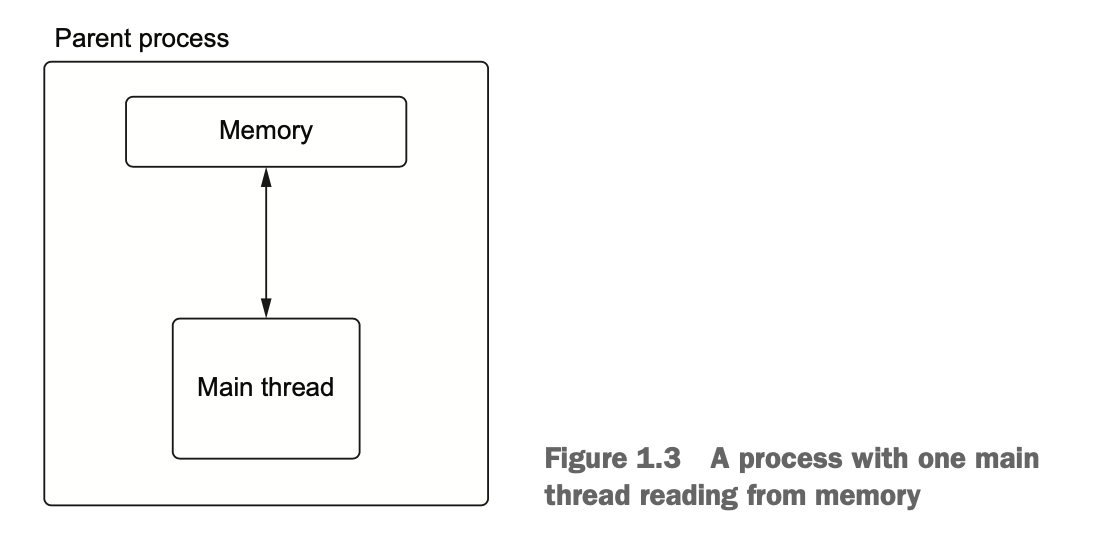

### Processes and threads in a simple Python application

In [1]:
import os
import threading

print(f"Python process running with process id: {os.getpid()}")
total_threads: int = threading.active_count()
thread_name: str = threading.current_thread().name

print(f"Python is currently running {total_threads} thread(s)")
print(f"The current thread is {thread_name}")

Python process running with process id: 11643
Python is currently running 7 thread(s)
The current thread is MainThread


#### Creating a multithreaded Python application

### Multithreading
Multithreading refers to the practice of running multiple threads within a single process, allowing concurrent execution. Python supports multithreading, but it is primarily useful for I/O-bound tasks (e.g., reading files, network requests).

However, Python's Global Interpreter Lock (GIL) restricts multiple native threads from executing Python bytecodes at once. This means Python threads aren't ideal for CPU-bound tasks, as only one thread executes at a time, despite the presence of multiple cores. The GIL ensures that only one thread can access Python objects at a time, preventing race conditions but also limiting true parallelism in CPU-bound tasks.



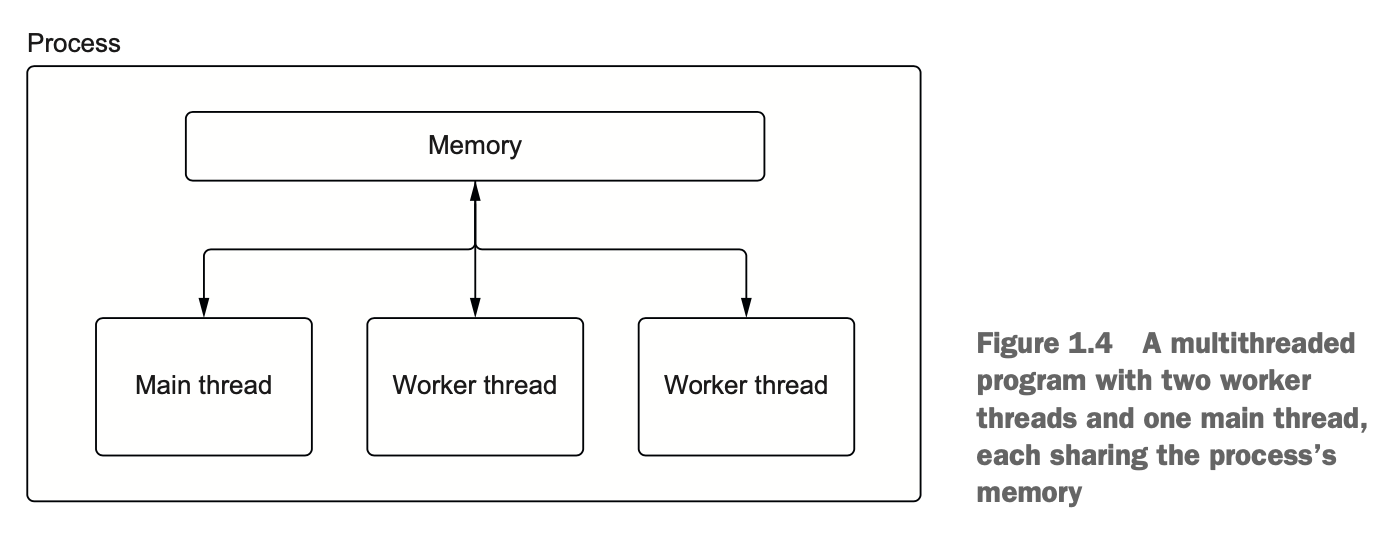

In [6]:
import threading


def hello_from_thread() -> None:
    print(f"Hello from thread {threading.current_thread()}!")


hello_thread = threading.Thread(target=hello_from_thread)
hello_thread.start()

total_threads: int = threading.active_count()
thread_name: int = threading.current_thread().name

print(f"\nPython is currently running {total_threads} thread(s)")
print(f"The current thread is {thread_name}")

hello_thread.join()

Hello from thread <Thread(Thread-13 (hello_from_thread), started 123145599930368)>!
Python is currently running 8 thread(s)
The current thread is MainThread



### Creating multiple processes

### Processes
A **process** is an **independent execution unit** that runs its own instance of the program with a **separate memory space**. Each process is isolated and cannot directly access the memory of other processes, making it safe from data corruption or interference.

When you run a Python application, you are creating a process. For instance, typing python in the command line starts the Python interpreter, which is an independent process. You can also create additional processes from within Python using the multiprocessing module, which allows each process to run in its own memory space.


### Multiprocessing
Multiprocessing is a technique where multiple processes are created to execute tasks concurrently. Each process runs independently and has its own memory space, which makes it ideal for CPU-bound tasks that need to run in parallel. Since processes don't share memory, multiprocessing avoids the issues caused by the GIL in Python.

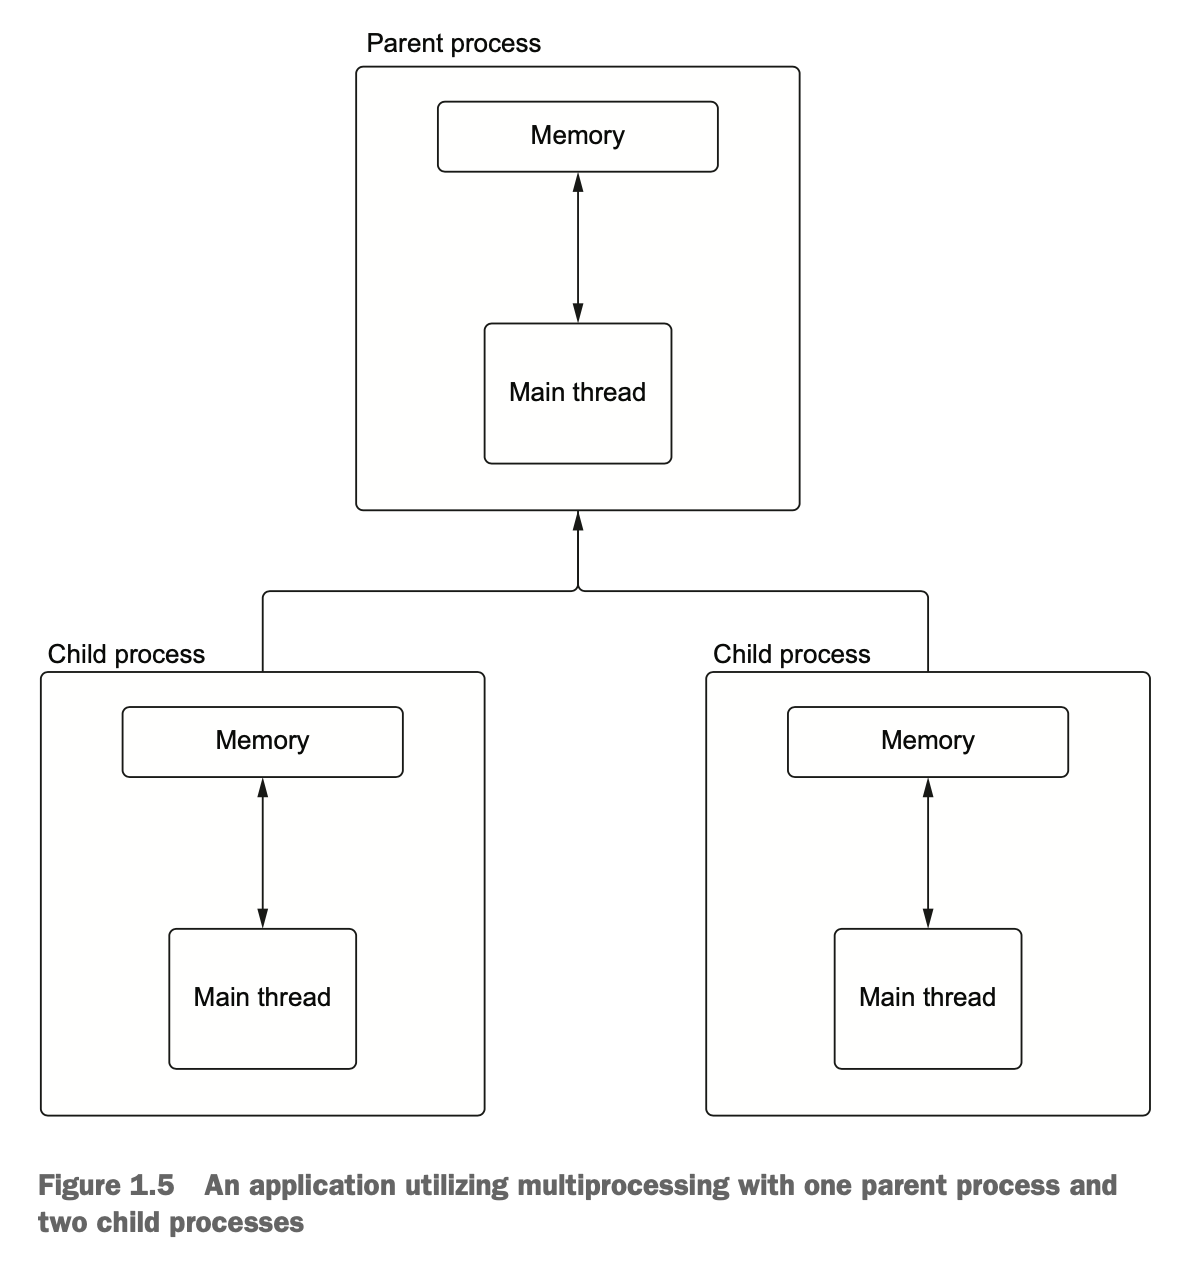

```python
import multiprocessing
import os


def hello_from_process() -> None:
    print(f"Hello from child process {os.getpid()}!")


if __name__ == "__main__":
    hello_process = multiprocessing.Process(target=hello_from_process)
    hello_process.start()

    print(f"Hello from parent process {os.getpid()}")

    hello_process.join()

# Hello from parent process 11937
# Hello from child process 11965!
```